In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [3]:

train_path = '/content/drive/MyDrive/ML Project/train.csv'

In [4]:
df_optiver = pd.read_csv(train_path)

In [5]:
df_optiver.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [13]:
df_optiver

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [7]:
df_optiver['imbalance_buy_sell_flag'].value_counts()

-1    2084349
 1    2022037
 0    1131594
Name: imbalance_buy_sell_flag, dtype: int64

# The Dataset consists of 5 million rows. As part of initial analysis, I'm considering subset of stocks with the Stock Ids [38,39,49]

In [8]:
df_optiver_id_subset = df_optiver[df_optiver['stock_id'].isin([38,39,40])]

In [9]:
df_optiver_id_subset


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
38,38,0,0,8940183.86,-1,1.000334,10108466.29,NaN,NaN,0.999849,26330.26,1.000455,79368.99,1.000000,7.829666,0,0_0_38
39,39,0,0,0.00,0,0.999539,5760193.65,NaN,NaN,0.999539,57147.72,1.000078,9724.25,1.000000,-4.699826,0,0_0_39
40,40,0,0,3338208.46,1,0.999080,2860543.58,NaN,NaN,0.999196,12955.50,1.000005,86.44,1.000000,-1.379847,0,0_0_40
229,38,0,10,8765420.30,-1,1.000697,10723317.02,NaN,NaN,1.000455,26511.39,1.000818,59734.26,1.000566,4.780292,1,0_10_38
230,39,0,10,0.00,0,0.999667,5760193.65,NaN,NaN,0.999641,13996.80,1.000104,3889.80,1.000004,-1.299977,1,0_10_39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237619,39,480,530,0.00,0,1.000666,18958947.26,1.000666,1.000666,1.000584,6816.04,1.000686,77905.60,1.000592,-2.710223,26453,480_530_39
5237620,40,480,530,0.00,0,1.002342,9215509.12,1.002342,1.002342,1.002342,20791.94,1.002545,50068.48,1.002402,-2.160072,26453,480_530_40
5237818,38,480,540,0.00,0,0.999641,29920706.69,0.999641,0.999641,0.999641,122218.50,0.999762,286978.81,0.999677,2.100468,26454,480_540_38
5237819,39,480,540,218472.62,1,1.000584,18946782.86,1.000625,1.000604,1.000481,9249.39,1.000686,196711.64,1.000490,0.129938,26454,480_540_39


In [11]:
df_optiver_id_subset.isna().sum()

stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                 0
imbalance_buy_sell_flag        0
reference_price                0
matched_size                   0
far_price                  43671
near_price                 43290
bid_price                      0
bid_size                       0
ask_price                      0
ask_size                       0
wap                            0
target                         0
time_id                        0
row_id                         0
dtype: int64

In [15]:
df_optiver_id_subset[['far_price', 'near_price']].describe()

,far_price,near_price
count,35694.000000,36075.000000
mean,0.999788,0.999816
std,0.017794,0.011391
min,0.785088,0.893071
25%,0.996548,0.997378
50%,0.999865,0.999847
75%,1.003098,1.002327
max,1.265147,1.106425


<ipython-input-14-82c2b758b63e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_optiver_id_subset.corr()


<Axes: >

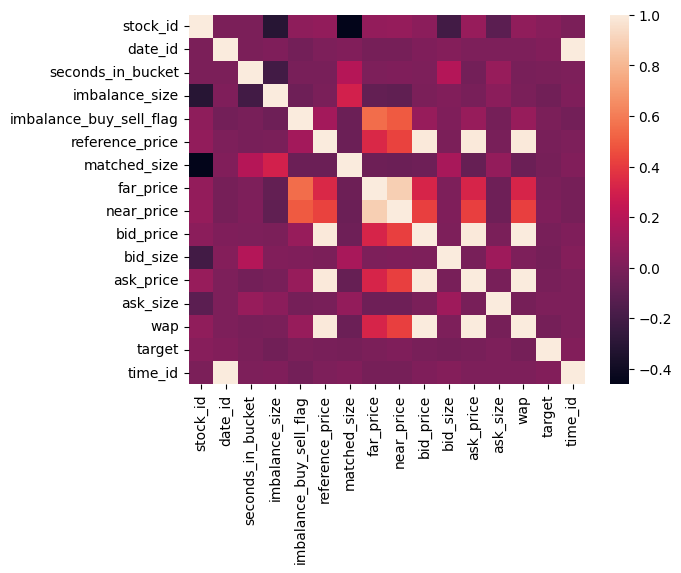

In [14]:
# # load the Auto dataset
# auto_df = sns.load_dataset('mpg')

# calculate the correlation matrix on the numeric columns
corr = df_optiver_id_subset.corr()

# plot the heatmap
sns.heatmap(corr)

# Inorder to fill the null values in both the columns for far price and near price we need to analyze the correlation between multiple columns to analyze how filling null values would effect other columns

## Filling the null values with density distribution

<Axes: xlabel='near_price', ylabel='Density'>

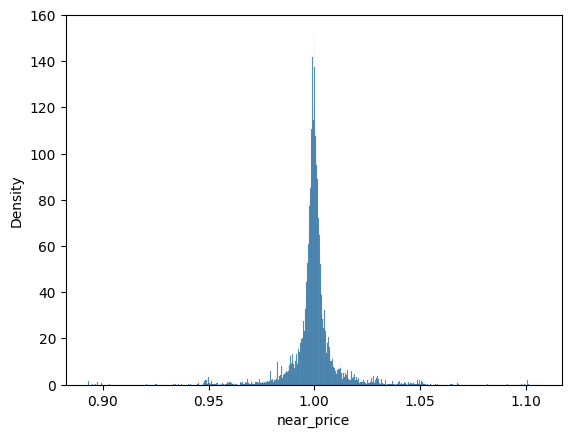

In [19]:
sns.histplot(x=df_optiver_id_subset.near_price, stat='density', bins=1000)

<ipython-input-27-2f35c42d477d>:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  ydata, xdata = np.histogram(near_price_norm, bins=1000, normed=True)


Text(0.5, 0, 'Normalized near price')

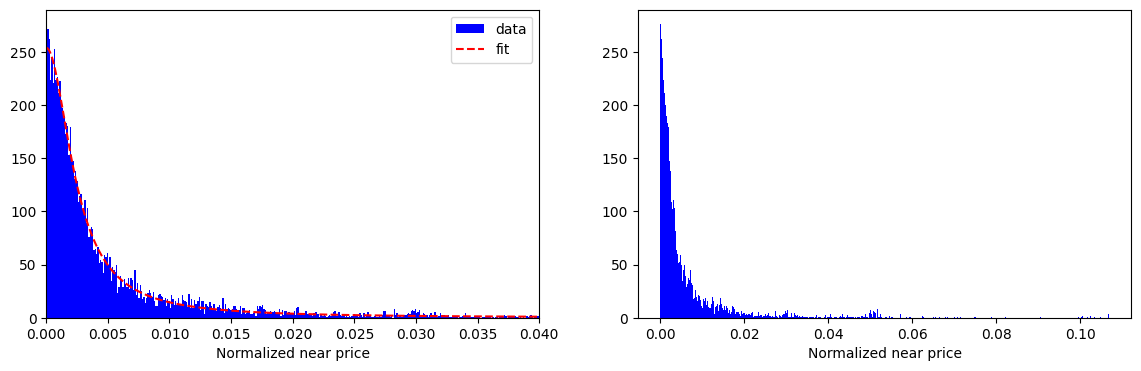

In [27]:
from scipy.optimize import curve_fit

# Define the Gaussian function
def near_price_fit(x, A, B):
    y = 1/(A + (B*x)**2)
    return y

near_price_norm = abs(df_optiver_id_subset.near_price - df_optiver_id_subset.near_price.mean()).dropna()

ydata, xdata = np.histogram(near_price_norm, bins=1000, normed=True)
parameters, covariance = curve_fit(near_price_fit, xdata[:-1], ydata)
fit_A_near = parameters[0]
fit_B_near = parameters[1]
fit = near_price_fit(xdata, fit_A_near, fit_B_near)

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(near_price_norm, bins=1000, label='data', density=True, color='blue')
plt.plot(xdata, fit, 'r--', label='fit')
plt.xlabel('Normalized near price')
plt.xlim((0,0.04))
plt.legend()
plt.subplot(122)
plt.hist(near_price_norm, bins=1000, label='data', density=True, color='blue')
plt.xlabel('Normalized near price')

In [39]:
# train_dataset['near_price_norm'] = abs(train_dataset.near_price - train_dataset.near_price.mean())
df_optiver_id_subset['near_price_norm'] = df_optiver_id_subset.near_price
N_near_price = df_optiver_id_subset['near_price_norm'].isna().sum()
x = np.arange(-1.3, 1.3, step=0.00001)
prob = near_price_fit(x, fit_A_near, fit_B_near)
df_optiver_id_subset.loc[df_optiver_id_subset['near_price_norm'].isna(), 'near_price_norm'] = random.choices(x, weights=prob, k=N_near_price)
# train_dataset['near_price'] = train_dataset['near_price'].fillna(train_dataset['near_price'].mean())
df_optiver_id_subset.head()

<ipython-input-39-04db029269d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optiver_id_subset['near_price_norm'] = df_optiver_id_subset.near_price


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,near_price_norm
38,38,0,0,8940183.86,-1,1.000334,10108466.29,NaN,NaN,0.999849,26330.26,1.000455,79368.99,1.000000,7.829666,0,0_0_38,-0.00351
39,39,0,0,0.00,0,0.999539,5760193.65,NaN,NaN,0.999539,57147.72,1.000078,9724.25,1.000000,-4.699826,0,0_0_39,-0.00058
40,40,0,0,3338208.46,1,0.999080,2860543.58,NaN,NaN,0.999196,12955.50,1.000005,86.44,1.000000,-1.379847,0,0_0_40,-0.00349
229,38,0,10,8765420.30,-1,1.000697,10723317.02,NaN,NaN,1.000455,26511.39,1.000818,59734.26,1.000566,4.780292,1,0_10_38,-0.00101
230,39,0,10,0.00,0,0.999667,5760193.65,NaN,NaN,0.999641,13996.80,1.000104,3889.80,1.000004,-1.299977,1,0_10_39,0.03103


# For Near Price

<Axes: xlabel='far_price', ylabel='Density'>

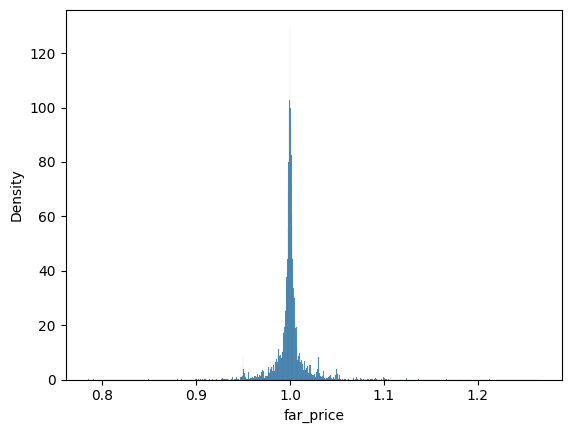

In [42]:
sns.histplot(x=df_optiver_id_subset.far_price, stat='density', bins=1000)

<ipython-input-43-9e8ee21b6582>:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  ydata, xdata = np.histogram(far_price_norm, bins=1000, normed=True)


Text(0.5, 0, 'Normalized far price')

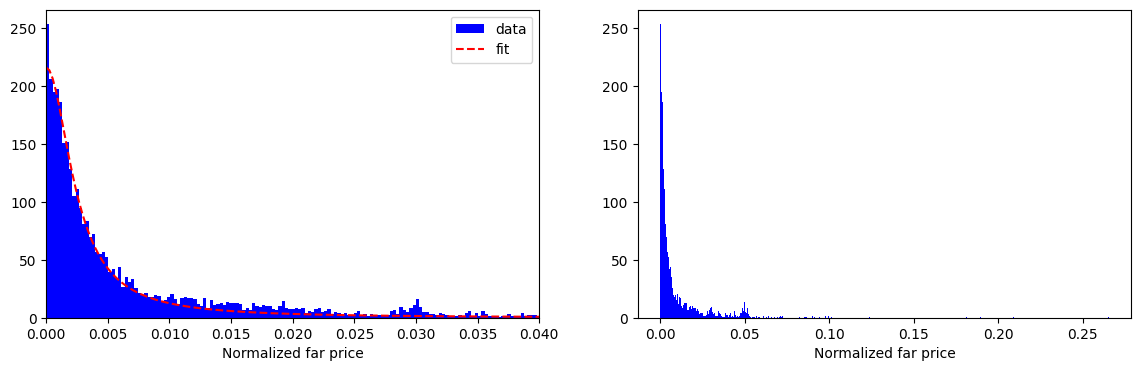

In [43]:
from scipy.optimize import curve_fit

# Define the Gaussian function
def far_price_fit(x, A, B):
    y = 1/(A + (B*x)**2)
    return y

far_price_norm = abs(df_optiver_id_subset.far_price - df_optiver_id_subset.far_price.mean()).dropna()

ydata, xdata = np.histogram(far_price_norm, bins=1000, normed=True)
parameters, covariance = curve_fit(far_price_fit, xdata[:-1], ydata)
fit_A_far = parameters[0]
fit_B_far = parameters[1]
fit = far_price_fit(xdata, fit_A_far, fit_B_far)

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(far_price_norm, bins=1000, label='data', density=True, color='blue')
plt.plot(xdata, fit, 'r--', label='fit')
plt.xlabel('Normalized far price')
plt.xlim((0,0.04))
plt.legend()
plt.subplot(122)
plt.hist(far_price_norm, bins=1000, label='data', density=True, color='blue')
plt.xlabel('Normalized far price')

In [44]:
# train_dataset['far_price_norm'] = abs(train_dataset.far_price - train_dataset.far_price.mean())
df_optiver_id_subset['far_price_norm'] = df_optiver_id_subset.far_price
N_far_price = df_optiver_id_subset['far_price_norm'].isna().sum()
x = np.arange(-1.3, 1.3, step=0.00001)
prob = far_price_fit(x, fit_A_far, fit_B_far)
df_optiver_id_subset.loc[df_optiver_id_subset['far_price_norm'].isna(), 'far_price_norm'] = random.choices(x, weights=prob, k=N_far_price)
# train_dataset['far_price'] = train_dataset['far_price'].fillna(train_dataset['far_price'].mean())
df_optiver_id_subset.head()

<ipython-input-44-7ce4fa26739c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optiver_id_subset['far_price_norm'] = df_optiver_id_subset.far_price


,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,near_price_norm,far_price_norm
38,38,0,0,8940183.86,-1,1.000334,10108466.29,NaN,NaN,0.999849,26330.26,1.000455,79368.99,1.000000,7.829666,0,0_0_38,-0.00351,-0.00582
39,39,0,0,0.00,0,0.999539,5760193.65,NaN,NaN,0.999539,57147.72,1.000078,9724.25,1.000000,-4.699826,0,0_0_39,-0.00058,-0.00069
40,40,0,0,3338208.46,1,0.999080,2860543.58,NaN,NaN,0.999196,12955.50,1.000005,86.44,1.000000,-1.379847,0,0_0_40,-0.00349,-0.02239
229,38,0,10,8765420.30,-1,1.000697,10723317.02,NaN,NaN,1.000455,26511.39,1.000818,59734.26,1.000566,4.780292,1,0_10_38,-0.00101,0.00126
230,39,0,10,0.00,0,0.999667,5760193.65,NaN,NaN,0.999641,13996.80,1.000104,3889.80,1.000004,-1.299977,1,0_10_39,0.03103,-0.00465


# remaining features Analysis

<Axes: xlabel='imbalance_buy_sell_flag', ylabel='Density'>

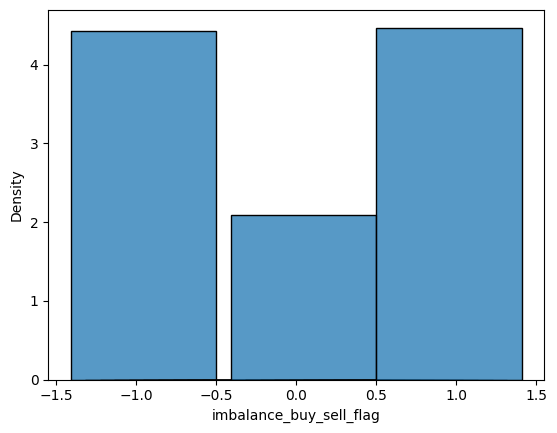

In [45]:
sns.histplot(x=df_optiver_id_subset.imbalance_buy_sell_flag, shrink=10, stat='density')


<Axes: xlabel='date_id', ylabel='wap'>

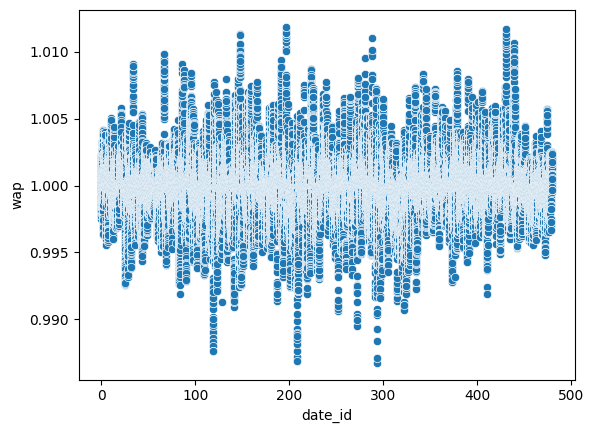

In [46]:
sns.scatterplot(x=df_optiver_id_subset.date_id, y=df_optiver_id_subset.wap)

<Axes: xlabel='wap', ylabel='target'>

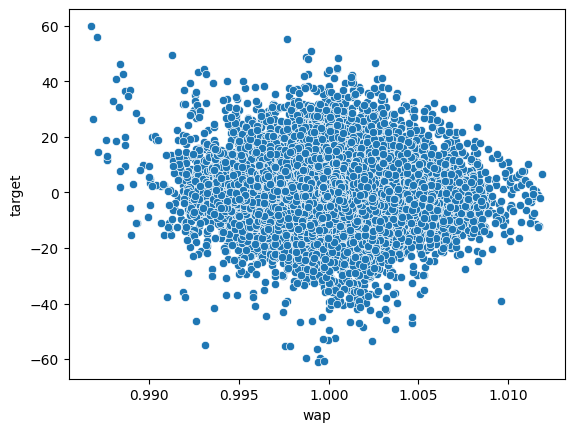

In [47]:
sns.scatterplot(x=df_optiver_id_subset.wap, y=df_optiver_id_subset.target)

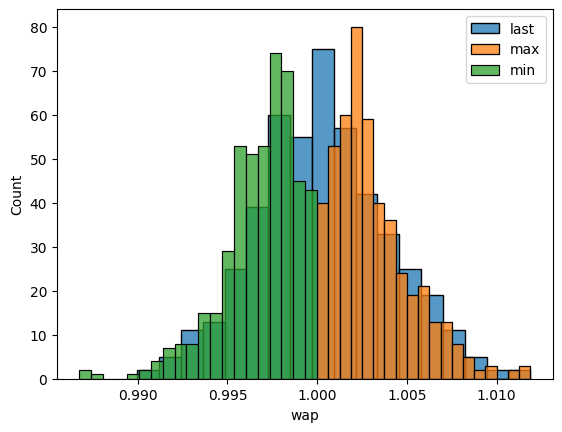

In [48]:
# sns.histplot(x=train_dataset.groupby('date_id').first().near_price)
sns.histplot(x=df_optiver_id_subset.groupby('date_id').last().wap, label='last')
sns.histplot(x=df_optiver_id_subset.groupby('date_id').wap.max(), label='max')
sns.histplot(x=df_optiver_id_subset.groupby('date_id').wap.min(), label='min')
plt.legend()

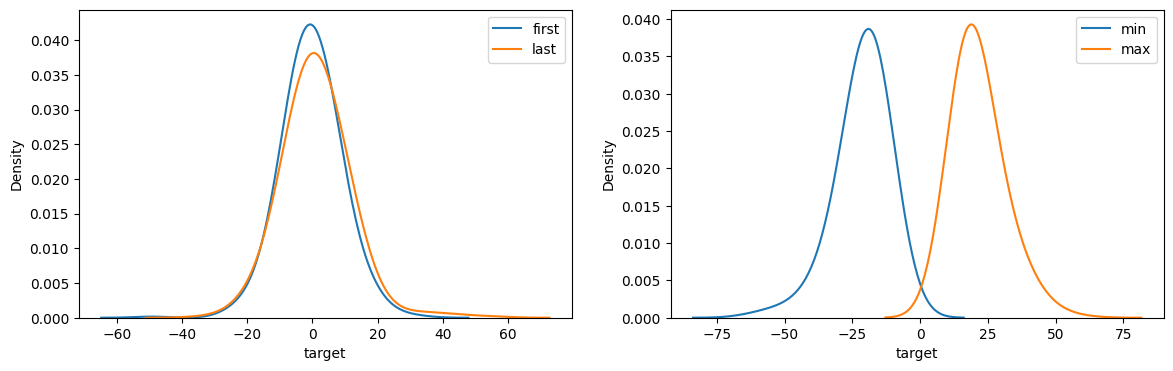

In [49]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(x=df_optiver_id_subset.groupby('date_id').target.first(), bw_adjust=2, label='first')
sns.kdeplot(x=df_optiver_id_subset.groupby('date_id').target.last(), bw_adjust=2, label='last')
plt.legend()
plt.subplot(122)
sns.kdeplot(x=df_optiver_id_subset.groupby('date_id').target.min(), bw_adjust=3, label='min')
sns.kdeplot(x=df_optiver_id_subset.groupby('date_id').target.max(), bw_adjust=3, label='max')
plt.legend()

<Axes: xlabel='target', ylabel='Density'>

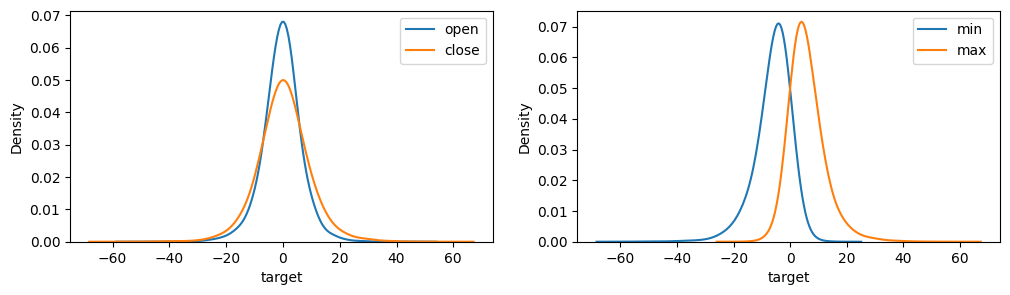

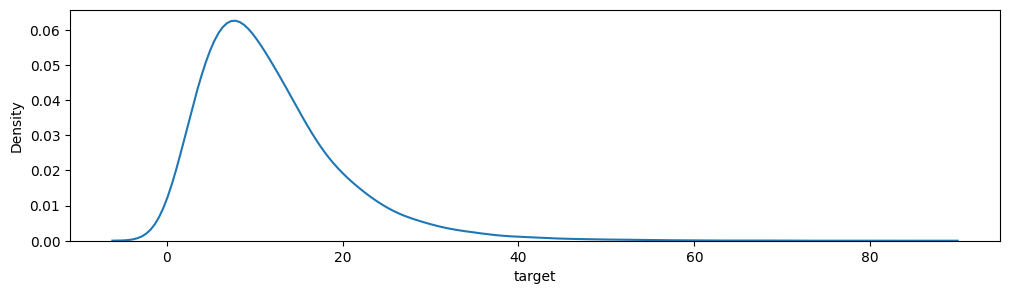

In [50]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.kdeplot(x=df_optiver_id_subset.groupby('time_id').target.first(), bw_adjust=2, label='open')
sns.kdeplot(x=df_optiver_id_subset.groupby('time_id').target.last(), bw_adjust=2, label='close')
plt.legend()
plt.subplot(122)
sns.kdeplot(x=df_optiver_id_subset.groupby('time_id').target.min(), bw_adjust=3, label='min')
sns.kdeplot(x=df_optiver_id_subset.groupby('time_id').target.max(), bw_adjust=3, label='max')
plt.legend()
plt.figure(figsize=(12,3))
sns.kdeplot(x=df_optiver_id_subset.groupby('time_id').target.max() - df_optiver_id_subset.groupby('time_id').target.min(), bw_adjust=2, label='max - min')